1.241147540135032


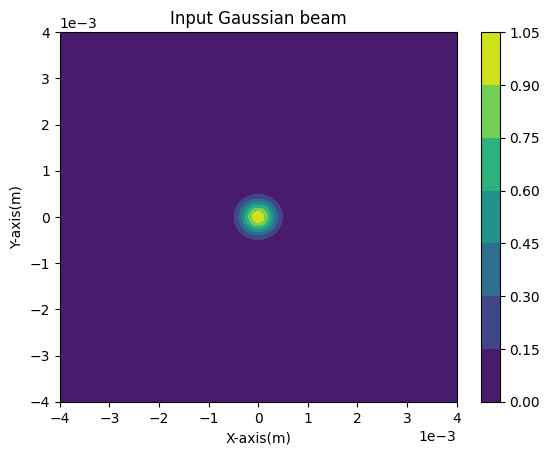

In [75]:
import numpy as np
import matplotlib.pyplot as plt

# Define one-dimensional arrays
Nx=2048
Ny=2048
Lx=8e-3
Ly=8e-3
x = np.linspace(-Lx/2, Lx/2, Nx)  # 101 points from -5 to 5
y = np.linspace(-Ly/2, Ly/2, Ny)


wavelength = 0.6328e-6  
k = 2 * np.pi / wavelength
w0 = 5e-4
X, Y = np.meshgrid(x, y)
A=1
z0=np.pi*w0**2/wavelength
z=z0     
print(z0)

E0 = A * np.exp(-(X**2 + Y**2) / w0**2)


plt.contourf(X,Y, np.abs(E0)**2, cmap='viridis')
plt.colorbar()
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
plt.xlabel('X-axis(m)')
plt.ylabel('Y-axis(m)')
plt.title('Input Gaussian beam')
plt.show()


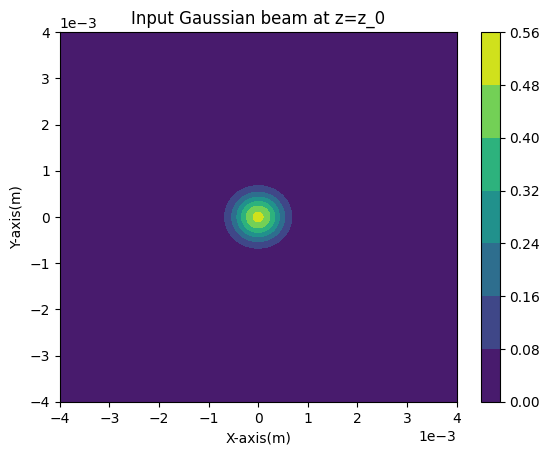

In [76]:
from scipy.fft import *

fE0=fft2(E0)

fx = 2*np.pi*fftfreq(Nx, d=Lx/Nx)
fy = 2*np.pi*fftfreq(Ny, d=Ly/Ny)
Fx, Fy = np.meshgrid(fx, fy)

distprop = np.exp(-1j * k * z * np.sqrt(1 - (wavelength**2 * Fx**2 + wavelength**2 * Fy**2) / (4 * np.pi**2)))


fE0d=distprop*fE0
E0d=ifft2(fE0d)

plt.contourf(X,Y,np.abs(E0d)**2, cmap='viridis')
plt.colorbar()
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
plt.xlabel('X-axis(m)')
plt.ylabel('Y-axis(m)')
plt.title('Input Gaussian beam at z=z_0')
plt.show()

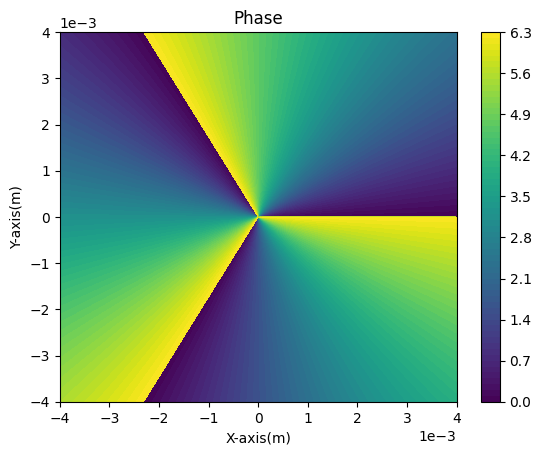

In [77]:
#slm

nx=100
ny=100
gy=ny/Ny 
gx=nx/Nx
l=3
phi=np.angle(X + 1j*Y)
#phase=np.mod(-l*phi + 2*np.pi*(gy*Y + gx*X), 2*np.pi)
phase=np.mod(l*phi, 2*np.pi)
slm=np.exp(1j*phase)



E0dslm=E0d*slm
custom_levels = np.arange(0, 6.4, 0.1)

plt.contourf(X,Y,np.abs(phase), levels=custom_levels,cmap='viridis')
plt.colorbar()
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
plt.xlabel('X-axis(m)')
plt.ylabel('Y-axis(m)')
plt.title('Phase')
plt.show()


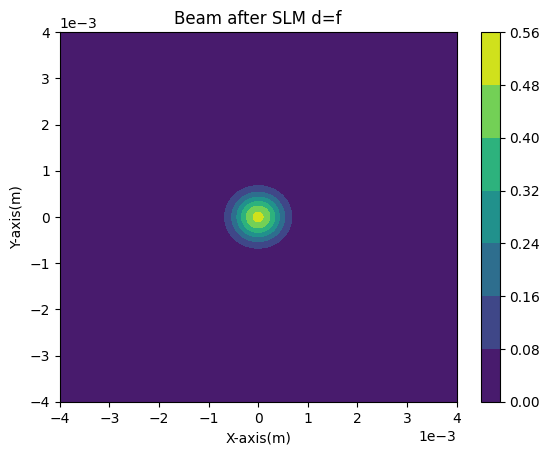

In [78]:
from scipy.fft import *
f=0.3
fE0dslm=fft2(E0dslm)

fxs = 2*np.pi*fftfreq(Nx, d=Lx/Nx)
fys = 2*np.pi*fftfreq(Ny, d=Ly/Ny)
Fxs, Fys = np.meshgrid(fx, fy)

distprops = np.exp(-1j * k * f * np.sqrt(1 - (wavelength**2 * Fx**2 + wavelength**2 * Fy**2) / (4 * np.pi**2)))


fE0dslm1=distprops*fE0dslm
E0dslm1=ifft2(fE0dslm)

plt.contourf(X,Y,np.abs(E0dslm1)**2, cmap='viridis')
plt.colorbar()
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
plt.xlabel('X-axis(m)')
plt.ylabel('Y-axis(m)')
plt.title('Beam after SLM d=f')
plt.show()

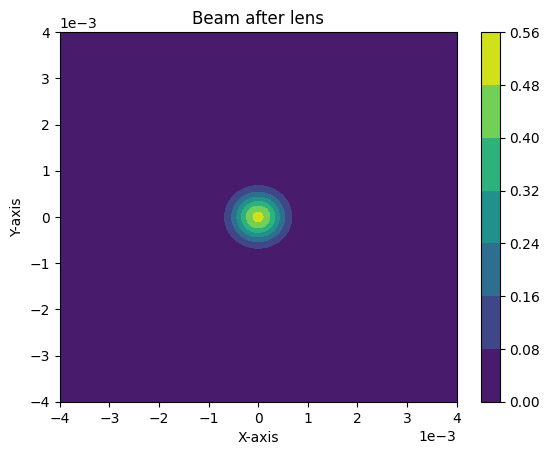

In [79]:
#LENTE a distancia f do SLM

f=0.3
tlente=np.exp(1j*k/(2*f)*(X**2+Y**2))
E0lente=E0dslm1*tlente

plt.contourf(X,Y,np.abs(E0lente)**2, cmap='viridis')
plt.colorbar()
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Beam after lens')
plt.show()



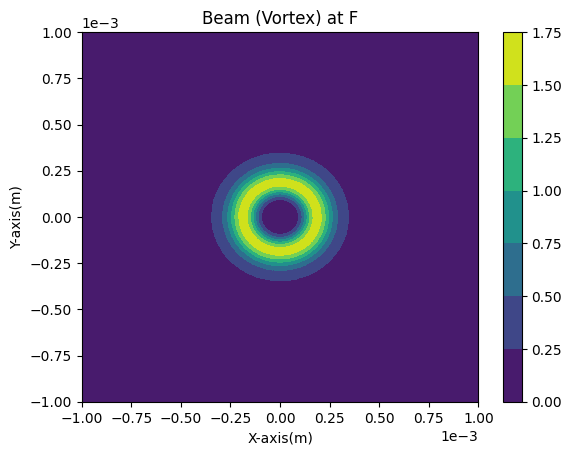

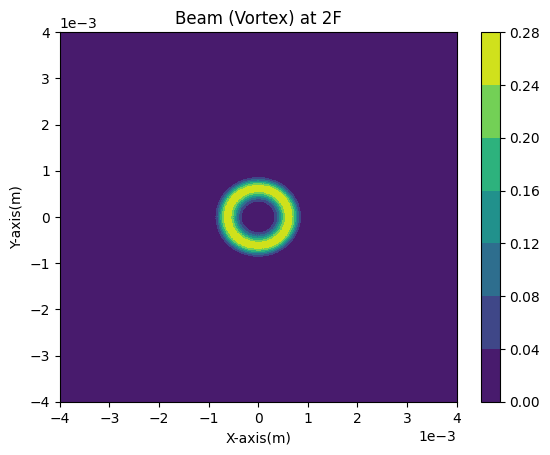

In [80]:
#IR PARA O FOCO

fE0lente=fft2(E0lente)

fxl = 2*np.pi*fftfreq(Nx, d=Lx/Nx)
fyl = 2*np.pi*fftfreq(Ny, d=Ly/Ny)
Fxl, Fyl = np.meshgrid(fxl, fyl)

def distproplente(d,k,wavelength,Fx,Fy):
    return np.exp(-1j * k * d * np.sqrt(1 - (wavelength**2 * Fx**2 + wavelength**2 * Fy**2) / (4 * np.pi**2)))


fE0dlentef=distproplente(f,k,wavelength,Fxl,Fyl)*fE0lente
fE0dlente2f=distproplente(2*f,k,wavelength,Fxl,Fyl)*fE0lente
fE0dlente3f=distproplente(3*f,k,wavelength,Fxl,Fyl)*fE0lente


E0dlentef=ifft2(fE0dlentef)
E0dlente2f=ifft2(fE0dlente2f)
E0dlente3f=ifft2(fE0dlente3f)

plt.contourf(X,Y,np.abs(E0dlentef)**2, cmap='viridis')
plt.colorbar()
plt.xlabel('X-axis(m)')
plt.ylabel('Y-axis(m)')
plt.title('Beam (Vortex) at F')
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
plt.xlim(-0.001, 0.001)
plt.ylim(-0.001, 0.001)
plt.show()


plt.contourf(X,Y,np.abs(E0dlente2f)**2, cmap='viridis')
plt.colorbar()
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
plt.xlabel('X-axis(m)')
plt.ylabel('Y-axis(m)')
plt.title('Beam (Vortex) at 2F')
plt.show()





